In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

In [2]:
path_data_NLD = os.path.join('/workspace/workspace/ufo-prediction', 'demo', 'df-NLD.pkl')
print(path_data_NLD)

/workspace/workspace/ufo-prediction/demo/df-NLD.pkl


In [3]:
ufo_dt = pd.read_pickle(path_data_NLD)

In [4]:
ufo_dt = ufo_dt.drop(columns='geometry')

In [5]:
ufo_dt.head(10)

source_file  dist_to_closest_int  \
0 30455805  NL_lod12_2d_pand_2            69.555515   
  30455806  NL_lod12_2d_pand_2            35.463128   
  30455808  NL_lod12_2d_pand_2            17.985232   
  30455810  NL_lod12_2d_pand_2            95.114116   
  30455811  NL_lod12_2d_pand_2            30.961365   
  30455812  NL_lod12_2d_pand_2            18.405913   
  30455813  NL_lod12_2d_pand_2            27.938686   
  30455815  NL_lod12_2d_pand_2            21.145624   
  30455816  NL_lod12_2d_pand_2            27.149969   
  30455817  NL_lod12_2d_pand_2            30.977436   

            av_footprint_area_within_buffer_100  \
0 30455805                            51.026027   
  30455806                            40.745854   
  30455808                            50.704372   
  30455810                          1534.660454   
  30455811                           141.972391   
  30455812                            49.351958   
  30455813                            55.570463   
  30455815                            78.006878   
  30455816                            71.527421   
  30455817                            45.704188   

            street_betweeness_global_max_within_buffer_500  \
0 30455805                                        0.391023   
  30455806                                        0.391023   
  30455808                                        0.391023   
  30455810                                        0.047122   
  30455811                                        0.069082   
  30455812                                        0.391023   
  30455813                                        0.375700   
  30455815                                        0.059881   
  30455816                                        0.025003   
  30455817                                        0.391023   

            av_elongation_within_buffer_500  std_building_footprint_city  \
0 30455805                         0.602624                   595.768727   
  30455806                         0.603193                   595.768727   
  30455808                         0.645863                   595.768727   
  30455810                         0.646683                   595.768727   
  30455811                         0.631512                   595.768727   
  30455812                         0.645245                   595.768727   
  30455813                         0.614401                   595.768727   
  30455815                         0.642418                   595.768727   
  30455816                         0.638653                   595.768727   
  30455817                         0.602035                   595.768727   

               block  blocks_2_to_4  \
0 30455805  42db2b0d          664.0   
  30455806  826ef96b          664.0   
  30455808  e0683b70          664.0   
  30455810  913af657          664.0   
  30455811  3b05561c          664.0   
  30455812  e0683b70          664.0   
  30455813  3dcd1a48          664.0   
  30455815  f160f1f0          664.0   
  30455816  5f50a42e          664.0   
  30455817  5f2017aa          664.0   

            street_closeness_500_av_within_buffer_500  \
0 30455805                                   0.000064   
  30455806                                   0.000064   
  30455808                                   0.000087   
  30455810                                   0.000089   
  30455811                                   0.000089   
  30455812                                   0.000087   
  30455813                                   0.000070   
  30455815                                   0.000088   
  30455816                                   0.000086   
  30455817                                   0.000064   

            street_width_std_within_buffer_100  ...  \
0 30455805                            2.409083  ...   
  30455806                            2.078913  ...   
  30455808                            1.892319  ...   
  30455810                            2.409602  ...  

In [6]:
print(ufo_dt.columns.to_list())

['source_file', 'dist_to_closest_int', 'av_footprint_area_within_buffer_100', 'street_betweeness_global_max_within_buffer_500', 'av_elongation_within_buffer_500', 'std_building_footprint_city', 'block', 'blocks_2_to_4', 'street_closeness_500_av_within_buffer_500', 'street_width_std_within_buffer_100', 'av_footprint_area_within_buffer_500', 'street_length_total_within_buffer_500', 'BlockConvexity', 'buildings_within_buffer_500', 'StdBlockFootprintArea', 'street_closeness_global_closest_street', 'std_block_footprint_area_within_buffer_100', 'street_based_block_std_orientation_inter_buffer_100', 'street_length_std_within_buffer_100', 'AvBlockFootprintArea', 'std_block_length_within_buffer_100', 'street_betweeness_global_av_within_buffer_500', 'street_based_block_std_area_inter_buffer_500', 'street_length_closest_street', 'Elongation', 'age', 'BlockLength', 'street_closeness_500_closest_street', 'street_length_total_within_buffer_100', 'street_based_block_number_inter_buffer_100', 'street_

In [7]:
ufo_dt['lat'].head(10)

0  30455805    51.773759
   30455806    51.774088
   30455808    51.779195
   30455810    51.784289
   30455811    51.780795
   30455812    51.779186
   30455813    51.774695
   30455815    51.780667
   30455816    51.779456
   30455817    51.773749
Name: lat, dtype: float64

In [8]:
ufo_dt['lon'].head(10)

0  30455805    4.614037
   30455806    4.611252
   30455808    4.610843
   30455810    4.620956
   30455811    4.618726
   30455812    4.611018
   30455813    4.616299
   30455815    4.621710
   30455816    4.624448
   30455817    4.613334
Name: lon, dtype: float64

In [9]:
# When loading RCA data
path_data_RCA = os.path.join('/workspace/workspace/ufo-prediction', 'demo', 'RCA_subset.csv')
rca_dt = pd.read_csv(path_data_RCA, encoding='latin1')

In [10]:
rca_dt['Lat_nb'].head(10)

0    51.481182
1    45.478762
2    41.842519
3    47.516231
4    47.516231
5    47.963353
6    50.503887
7    50.503887
8    50.503887
9    50.503887
Name: Lat_nb, dtype: float64

In [11]:
rca_dt['Lon_nb'].head(10)

0    -0.436324
1     9.199427
2    12.472290
3    14.550072
4    14.550072
5    16.402609
6     4.469936
7     4.469936
8     4.469936
9     4.469936
Name: Lon_nb, dtype: float64

In [16]:
# Function to create GeoDataFrame from DataFrame
def create_geodataframe(df, lat_col, lon_col):
    df['geometry'] = df.apply(lambda row: Point(row[lon_col], row[lat_col]), axis=1)
    return gpd.GeoDataFrame(df, geometry='geometry')

# Create GeoDataFrames
gdf_rca = create_geodataframe(rca_dt, 'Lat_nb', 'Lon_nb')
gdf_ufo = create_geodataframe(ufo_dt, 'lat', 'lon')

# Setting coordinate system (assuming WGS84)
gdf_rca.set_crs(epsg=4326, inplace=True)
gdf_ufo.set_crs(epsg=4326, inplace=True)

source_file  dist_to_closest_int  \
0   30455805  NL_lod12_2d_pand_2            69.555515   
    30455806  NL_lod12_2d_pand_2            35.463128   
    30455808  NL_lod12_2d_pand_2            17.985232   
    30455810  NL_lod12_2d_pand_2            95.114116   
    30455811  NL_lod12_2d_pand_2            30.961365   
...                          ...                  ...   
487 21040535  NL_lod12_2d_pand_2            21.542293   
    21040536  NL_lod12_2d_pand_2            17.438636   
    21040538  NL_lod12_2d_pand_2            47.233711   
    21040539  NL_lod12_2d_pand_2            13.180558   
    21040540  NL_lod12_2d_pand_2            50.503679   

              av_footprint_area_within_buffer_100  \
0   30455805                            51.026027   
    30455806                            40.745854   
    30455808                            50.704372   
    30455810                          1534.660454   
    30455811                           141.972391   
...                                           ...   
487 21040535                            58.408621   
    21040536                            45.093598   
    21040538                            63.235197   
    21040539                            81.886988   
    21040540                            53.031771   

              street_betweeness_global_max_within_buffer_500  \
0   30455805                                        0.391023   
    30455806                                        0.391023   
    30455808                                        0.391023   
    30455810                                        0.047122   
    30455811                                        0.069082   
...                                                      ...   
487 21040535                                        0.135412   
    21040536                                        0.023616   
    21040538                                        0.086778   
    21040539                                        0.121191   
    21040540                                        0.124016   

              av_elongation_within_buffer_500  std_building_footprint_city  \
0   30455805                         0.602624                   595.768727   
    30455806                         0.603193                   595.768727   
    30455808                         0.645863                   595.768727   
    30455810                         0.646683                   595.768727   
    30455811                         0.631512                   595.768727   
...                                       ...                          ...   
487 21040535                         0.680430                   590.331161   
    21040536                         0.643233                   590.331161   
    21040538                         0.625156                   590.331161   
    21040539                         0.623785                   590.331161   
    21040540                         0.589599                   590.331161   

                 block  blocks_2_to_4  \
0   30455805  42db2b0d          664.0   
    30455806  826ef96b          664.0   
    30455808  e0683b70          664.0   
    30455810  913af657          664.0   
    30455811  3b05561c          664.0   
...                ...            ...   
487 21040535  eb0cf5d0         9221.0   
    21040536  a15da033         9221.0   
    21040538  f1c08276         9221.0   
    21040539  d44a12c3         9221.0   
    21040540  3fe75eea         9221.0   

              street_closeness_500_av_within_buffer_500  \
0   30455805                                   0.000064   
    30455806                                   0.000064   
    30455808                                   0.000087   
    30455810                                   0.000089   
    30455811                                   0.000089   
...                                                 ...   
487 21040535                                   0.000032   
    21040536                

In [17]:
# Transform the CRS to UTM zone 32N (EPSG:32632) so that distances are in meters
gdf_rca_n = gdf_rca.to_crs(epsg=32632)
gdf_ufo_n = gdf_ufo.to_crs(epsg=32632)

In [68]:
# Buffer for approximate match (11 meters)
#buffer_distance = 11000  # Approximate conversion to degrees

# Adding buffer to RCA data
#gdf_rca['geometry'] = gdf_rca.geometry.buffer(buffer_distance)

In [26]:
# Spatial join - finds matches within 11 meters
matches = gpd.sjoin_nearest(gdf_rca_n, gdf_ufo_n, distance_col='distances', how='left', max_distance=110)

In [27]:
matches['index_right0']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
84257   NaN
84258   NaN
84259   NaN
84260   NaN
84261   NaN
Name: index_right0, Length: 84262, dtype: float64

In [28]:
print(matches['buildings_within_buffer_100'].count())
print(matches['index_right0'].count())
print(matches['index_right1'].count())

7318
7318
7318


In [29]:
print(matches['Property_id'].count())

84262


In [30]:
matches.head(10)

,Unnamed: 0,PropertyKey_ID,Deal_id,Property_id,Status_tx,Status_dt,TransType_tx,country_left,Main Type,SubType,...,street_betweeness_global_max_within_buffer_100,TouchesIndexes,street_based_block_av_phi_inter_buffer_500,total_length_street_city,total_buildings_footprint_city,Phi,street_based_block_std_area_inter_buffer_100,type,neighborhood,distances
0,1,243744,1243328,1463286,closed,10/03/2015,Sale,United Kingdom,Hotel,Full-Service,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,248036,2078430,1752873,closed,04/08/2017,Sale,Italy,Hotel,Full-Service,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,249080,2040558,1738197,closed,31/07/2017,Sale,Italy,Hotel,Full-Service,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,256328,486913,448575,closed,24/05/2007,Sale,Austria,Retail,Centers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,256329,488158,450528,closed,15/05/2007,Sale,Austria,Retail,Shops,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,256337,483066,443560,closed,11/04/2008,Sale,Austria,Dev Site,Dev Site,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,256386,472185,430448,closed,11/09/2008,Sale,Belgium,Retail,Centers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,256390,488114,450109,closed,08/06/2007,Entity Level,Belgium,Retail,Shops,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,256391,490685,454526,closed,21/11/2007,Sale,Belgium,Retail,Centers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,256392,491402,455441,closed,12/11/2007,Sale,Belgium,Retail,Centers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Identifying match type
def match_type(row):
    if pd.isna(row['index_right0']):
        return 'no match'
    elif row['Lat_nb'] == row['lat'] and row['Lon_nb'] == row['lon']:
        return 'exact match'
    elif round(row['Lat_nb'], 5) == round(row['lat'], 5) and round(row['Lon_nb'], 5) == round(row['lon'], 5):
        return '5th decimal place match'
    else:
        return 'approximate match'

matches['match_type'] = matches.apply(match_type, axis=1)

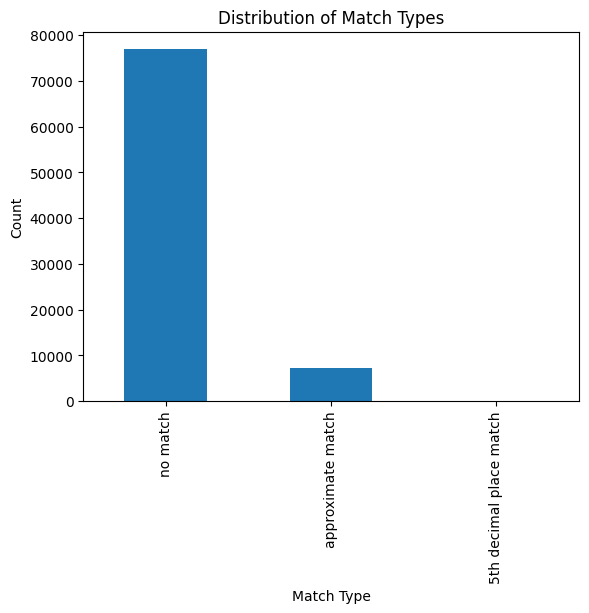

In [32]:
import matplotlib.pyplot as plt

# Assuming 'matches' is your DataFrame and it has a column named 'match_type'
matches['match_type'].value_counts().plot(kind='bar')

plt.xlabel('Match Type')
plt.ylabel('Count')
plt.title('Distribution of Match Types')
plt.show()


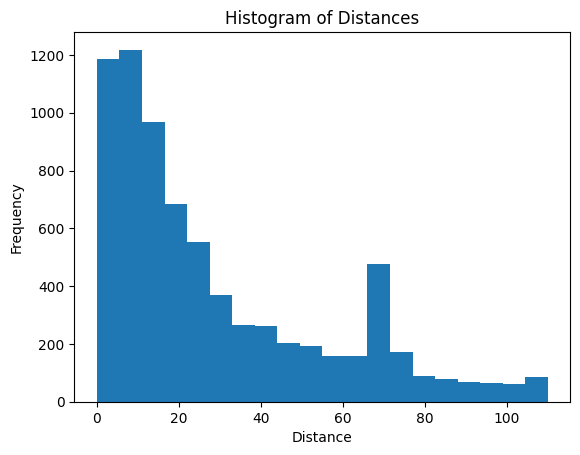

In [33]:
import matplotlib.pyplot as plt

# Assuming 'matches' is your DataFrame and it has a numerical column named 'distances'
matches['distances'].plot(kind='hist', bins=20)  # You can adjust the number of bins

plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.show()